## Gambler's Problem
### Exercise 4.9 (programming) 
Implement value iteration for the gambler’s problem and
solve it for $p_h = 0.25$ and $p_h = 0.55$. In programming, you may find it convenient to
introduce two dummy states corresponding to termination with capital of 0 and 100,
giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3.
Are your results stable as $\theta$ $\rightarrow$ 0? 

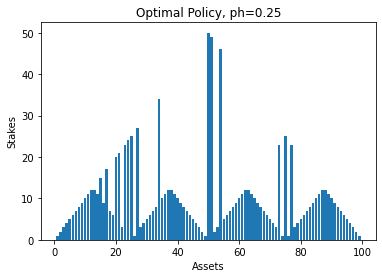

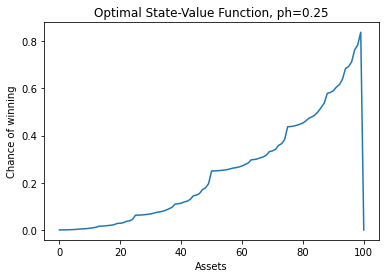

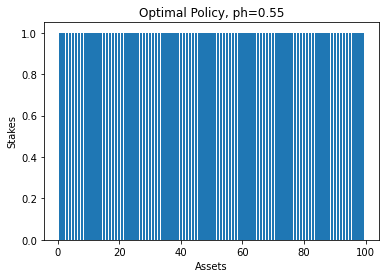

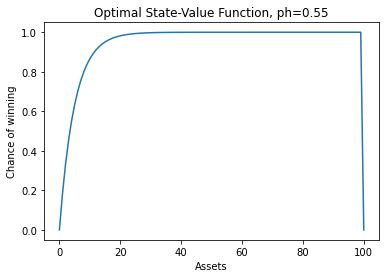

In [44]:
import numpy as np
import matplotlib.pyplot as plt

"""
Implementing value iteration algorithm for the Gambler's problem
"""

def train_model(p_head):
    """
    Calculate p(s', r | s, a)
    
    Parameters
    ----------
        p_head : float
            Probability of turning heads
    
    Returns
    -------
        dict
            p(s', r | s, a) = { (s', r) : [p_head, p_tail] }
    """
    P = {}
    for s in range(1,100): 
        for stake in range(s+1):
            P[(s, stake)] = []
            P[(s, stake)].append(p_head)
            P[(s, stake)].append(1 - p_head)
    return P

def value_iter(dynamics, theta, gamma):
    """
    Update state-value function using value iteration
    Calculate optimal policy based on optimal value
    
    Parameters
    ----------
        dynamics : dict
            p(s', r | s, a) = { (s', r) : [p_head, p_tail] }
        theta : float
            Convergence parameter
        gamma : float
            Discount parameter
        
    Returns
    -------
        ndarray
            Optimal policy
        ndarray
            Optimal state-value function
    """
    V = np.zeros(101)
    pi = np.zeros(99)   
    while True:
        delta = 0
        for s in range(1, 100):
            v = V[s]
            stakes = np.arange(1, s+1, 1, dtype=int)
            rewards = [1 if (s + stk >= 100) else 0 for stk in stakes]
            returns = np.array([(dynamics[(s, a)][0] * (r + gamma * V[min(s + a, 100)]) + 
                                dynamics[(s, a)][1] * (gamma * V[s - a])) for a, r in zip(
                                                                        stakes, rewards)])
            V[s] = np.max(returns)
            delta = max(delta, abs(v - V[s]))
        if (delta < theta):
            break
            
    for s in range(1, 100):
        stakes = np.arange(1, s+1, 1, dtype=int)
        rewards = [1 if (s + stk >= 100) else 0 for stk in stakes]
        returns = np.array([(dynamics[(s, a)][0] * (r + gamma * V[min(s + a, 100)]) + 
                            dynamics[(s, a)][1] * (gamma * V[s - a])) for a, r in zip(
                                                                    stakes, rewards)])
        pi[s-1] = stakes[np.argmax(returns)]
        
    return pi, V
    
if __name__ == "__main__":
    p_heads = [0.25, 0.55]
    for ph in p_heads:
        dynamics = train_model(ph)
        (pi, v) = value_iter(dynamics, np.finfo(float).eps, 1)

        plt.figure()
        plt.bar(range(1,100), pi)
        plt.title('Optimal Policy, ph={}'.format(ph))
        plt.xlabel('Assets')
        plt.ylabel('Stakes')
        plt.figure()
        plt.plot(v)
        plt.title('Optimal State-Value Function, ph={}'.format(ph))
        plt.xlabel('Assets')
        plt.ylabel('Chance of winning')
